In [11]:
import random
import networkx as nx
from matplotlib import pyplot as plt
from collections import Counter
import math
from utils.plotTools import plot_qwak
import os
import ast

def random_walk(graph, start_node, num_steps=10, num_walks=1):
    walks = []
    for _ in range(num_walks):
        walk = [start_node]
        for _ in range(num_steps):
            neighbors = list(nx.neighbors(graph, walk[-1]))
            if neighbors:
                next_node = random.choice(neighbors)
                walk.append(next_node)
            else:
                break
        walks.append(walk)
    return walks

def walks_to_frequency(graph, walks):
    # Concatenate all the walks into a single list
    all_walks = [node for walk in walks for node in walk]
    
    # Count the occurrences of each node
    counter = Counter(all_walks)
    
    # Convert the counter to a list of frequencies
    frequency = [0]*len(graph.nodes)
    for node, count in counter.items():
        frequency[node] = count
    return frequency

def frequency_to_probability(frequency):
    total_steps = sum(frequency)
    probability = [f / total_steps for f in frequency]
    return probability

def estimate_cover_time(graph_list, num_simulations=1000):
    cover_times = []

    for graph in graph_list:
        total_steps = 0

        for _ in range(num_simulations):
            visited = set()
            start_node = random.choice(list(graph.nodes))
            current_node = start_node

            while len(visited) < len(graph.nodes):
                visited.add(current_node)
                neighbors = list(nx.neighbors(graph, current_node))
                current_node = random.choice(neighbors)
                total_steps += 1

        # Average the total steps over the number of simulations
        average_cover_time = total_steps / num_simulations
        cover_times.append(average_cover_time)
    return cover_times

In [50]:
import json

def load_list_from_file(file_path):
    with open(file_path, 'r') as file:
        data_str = file.read()
    data = [json.loads(line) for line in data_str.splitlines()]
    return data


def write_list_to_file(file_path, data):
    data_str = [str(item) for item in data]  # Convert float values to strings
    with open(file_path, 'w') as file:
        file.write('\n'.join(data_str))
        
def load_or_generate_data(file1, file2, generation_func1, generation_func2, args1=(), kwargs1={}, args2=(), kwargs2={}):
    """
    Load data from files if they exist, or generate data using specified functions.
    
    :param file1: the file path to load the first data from
    :param file2: the file path to load the second data from
    :param generation_func1: the function to generate the first data if the file doesn't exist
    :param generation_func2: the function to generate the second data if the file doesn't exist
    :param args1: tuple containing positional arguments for the first generation function
    :param kwargs1: dict containing keyword arguments for the first generation function
    :param args2: tuple containing positional arguments for the second generation function
    :param kwargs2: dict containing keyword arguments for the second generation function
    :return: a tuple containing the two datasets
    """
    
    if os.path.exists(file1) and os.path.exists(file2):
        data1 = load_list_from_file(file1)
        data2 = load_list_from_file(file2)
        print('Files exist!')
    else:
        print('Files do not exist, generating data...')
        data1 = generation_func1(*args1, **kwargs1)
        data2 = generation_func2(*args2, **kwargs2)
        
        if not os.path.exists(file1):
            write_list_to_file(file1, data1)
            
        if not os.path.exists(file2):
            write_list_to_file(file2, data2)
    
    return data1, data2

In [13]:
n = 200
G = nx.path_graph(n)
start_node = n//2
walk = random_walk(G, start_node, num_steps=200, num_walks=500)
frequency = walks_to_frequency(G, walk)
probability = frequency_to_probability(frequency)

# Cover time - Static Graphs

From the paper:
    
-> Results for the cover time of specific graphs vary from the optimal cover time of Θ(n log n) associated with the complete graph, to the worst case of Θ(n3) associated with the lollipop graph.

## Complete Graph

In [14]:
def complete_graph_cover_time(n_range):
    cover_times = []
    for n in n_range:
        cover_times.append(n * math.log(n))
    return cover_times

In [65]:
n_range = range(5, 100)
samples = 100
graph_list = [nx.complete_graph(n) for n in n_range]

cover_times_random_walk_complete_file = f'Datasets/DynGraphsDTRW/coverTimeComplete_N{n_range}_S{samples}.txt'
estimate_complete_cover_time_file = f'Datasets/DynGraphsDTRW/estimateCoverTimeComplete_N{n_range}_S{samples}.txt'

if os.path.exists(cover_times_random_walk_complete_file) and os.path.exists(estimate_complete_cover_time_file):
    cover_times_random_walk_complete = load_list_from_file(cover_times_random_walk_complete_file)
    estimate_complete_cover_time = load_list_from_file(estimate_complete_cover_time_file)
    print('File exists!')
else:
    print('File Doesnt Exist!')
    cover_times_random_walk_complete = estimate_cover_time(graph_list, num_simulations=samples)
    estimate_complete_cover_time = complete_graph_cover_time(n_range)
    if not os.path.exists(cover_times_random_walk_complete_file):
        write_list_to_file(cover_times_random_walk_complete_file, cover_times_random_walk_complete)
    if not os.path.exists(estimate_complete_cover_time_file):
        write_list_to_file(estimate_complete_cover_time_file, estimate_complete_cover_time)
        

File exists!


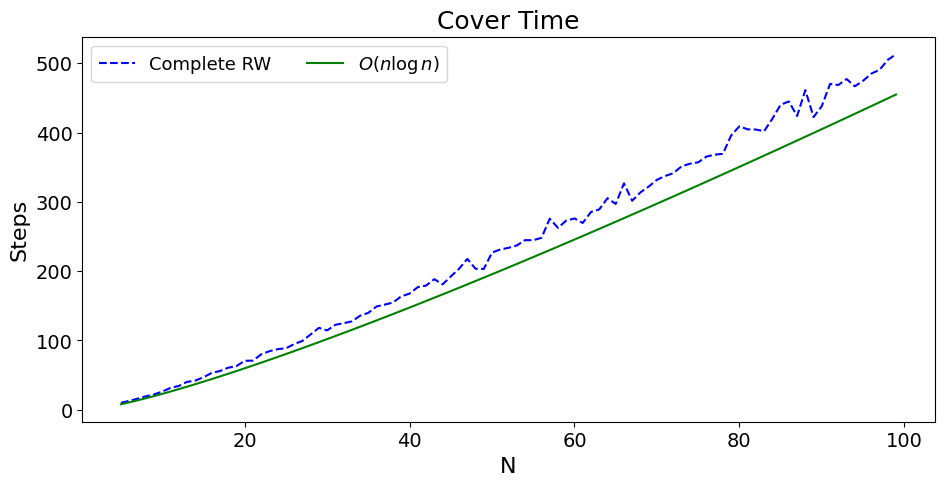

In [67]:
alphaLabelList = [r'Complete RW',r'$O(n\log n)$']

params = {
    'font_size' : 14,
    'figsize': (11, 5),
    'plot_title' : f'Cover Time',
    'x_label' : 'N',
    'y_label' : "Steps",
    'legend_labels' : alphaLabelList,
    'legend_loc': "best",
    # 'legend_title' : r'$\alpha$',
    'legend_ncol' : 3,
    'color_list' : ['#0000FF', '#008000', '#525252'],
    'line_style_list' : ['--', '-','-.' ],
    # 'save_path' : f'Output/OrientedDynamics/orientedDynamics_N{N}_NWALKS{len(alphaList)}_Alphas{str([round(a, 2) for a in alphaList]).replace(", ", "-").replace("[", "").replace("]", "")}_TMAX{round(t)}.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    # 'x_num_ticks' : 7,
    # 'y_num_ticks' : 7,
    # 'x_round_val' : 1,
    # 'y_round_val' : 3,
}

node_value_matrix = list(range(5,100))
plot_qwak(x_value_matrix = [list(range(5,100)),list(range(5,100))] , y_value_matrix = [cover_times_random_walk_complete,estimate_complete_cover_time],**params)

## Lollipop graph

Scaling either one of the lollipop parameters while keeping the other constant seems to result in a sub-n^3 cover time scaling. Only when both are scaled (equally?) do we see a behavior like that. What is the intuition behind this?

In [39]:
def lollipop_graph_cover_time(n_range,num_simulations):
    cover_times = []
    for n in n_range:
        cover_times.append(n ** 3)
    print(len(cover_times))
    return cover_times

In [63]:
m_range = range(2, 100)
# m = 20
n_range = range(2, 100)
# n = 20
sum_range = []
samples = 100

graph_list = [nx.lollipop_graph(m,n) for m,n in zip(m_range,n_range)]
# graph_list = [nx.lollipop_graph(m,n) for m in m_range]
for graph in graph_list:
    sum_range.append(len(graph))

cover_times_random_walk_lollipop_file = f'Datasets/DynGraphsDTRW/coverTimeLollipop_N{sum_range[-1]}_S{samples}.txt'
estimate_lollipop_cover_time_file = f'Datasets/DynGraphsDTRW/estimateCoverTimeLollipop_N{sum_range[-1]}_S{samples}.txt'

print(f'Looking for: \n-----> {cover_times_random_walk_lollipop_file}\n-----> {estimate_lollipop_cover_time_file}')

if os.path.exists(cover_times_random_walk_lollipop_file) and os.path.exists(estimate_lollipop_cover_time_file):
    cover_times_random_walk_lollipop = load_list_from_file(cover_times_random_walk_lollipop_file)
    estimate_lollipop_cover_time = load_list_from_file(estimate_lollipop_cover_time_file)
    print('\nFile exists!')
else:
    print('\nFile Doesnt Exist!')
    cover_times_random_walk_lollipop = estimate_cover_time(graph_list, num_simulations=samples)
    estimate_lollipop_cover_time = lollipop_graph_cover_time(sum_range,samples)
    if not os.path.exists(cover_times_random_walk_lollipop_file):
        write_list_to_file(cover_times_random_walk_lollipop_file, cover_times_random_walk_lollipop)
    if not os.path.exists(estimate_lollipop_cover_time_file):
        write_list_to_file(estimate_lollipop_cover_time_file, estimate_lollipop_cover_time)


Looking for: 
-----> Datasets/DynGraphsDTRW/coverTimeLollipop_N198_S100.txt
-----> Datasets/DynGraphsDTRW/estimateCoverTimeLollipop_N198_S100.txt

File exists!


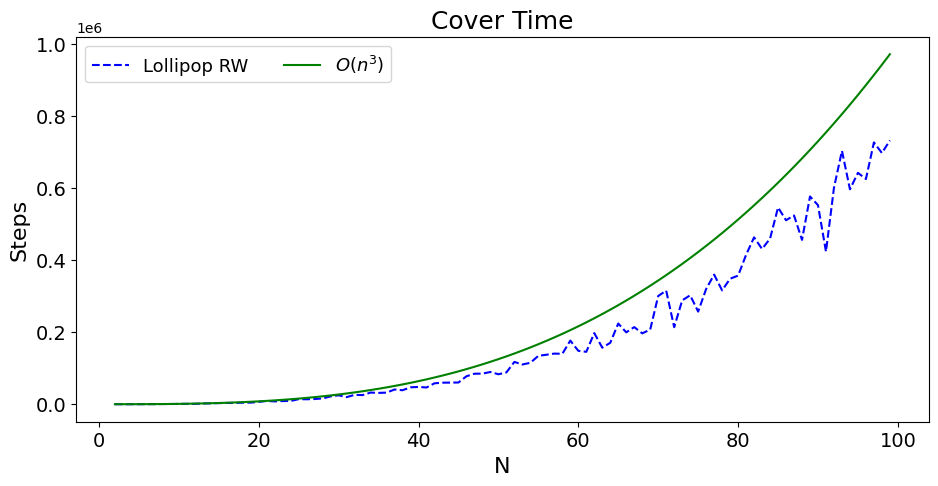

In [58]:
alphaLabelList = [r'Lollipop RW',r'$O(n^3)$']

params = {
    'font_size' : 14,
    'figsize': (11, 5),
    'plot_title' : f'Cover Time',
    'x_label' : 'N',
    'y_label' : "Steps",
    'legend_labels' : alphaLabelList,
    'legend_loc': "best",
    # 'legend_title' : r'$\alpha$',
    'legend_ncol' : 3,
    'color_list' : ['#0000FF', '#008000', '#525252'],
    'line_style_list' : ['--', '-','-.' ],
    # 'save_path' : f'Output/OrientedDynamics/orientedDynamics_N{N}_NWALKS{len(alphaList)}_Alphas{str([round(a, 2) for a in alphaList]).replace(", ", "-").replace("[", "").replace("]", "")}_TMAX{round(t)}.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    # 'x_num_ticks' : 7,
    # 'y_num_ticks' : 7,
    # 'x_round_val' : 1,
    # 'y_round_val' : 3,
}

plot_qwak(x_value_matrix = [list(n_range),list(n_range)] , y_value_matrix = [cover_times_random_walk_lollipop,estimate_lollipop_cover_time],**params)